# 모델에 대한 설명1_PFI
* Permutation Feature Importance


## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import * 

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session

### 2) 데이터 로딩

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


* 변수 설명
    * crim : 범죄율
    * zn : 대저택 비율
    * indus : 산업단지 비율
    * chas : 찰스 강변 여부
    * nox : 일산화질소 농도(공기오염도)
    * rm : 평균 주택당 방 수
    * age : 30년 이상된 주택 비율
    * dis : 주요 업무 지역 접근성 지수
    * rad : 고속도로 접근성 지수
    * tax  1만 달러당 재산세
    * ptratio : 교사 1명당 학생수
    * lstat : 하위계층 비율
    * black : 흑인비율(원래 숫자를 변형한 것임)
    * mdev : 타운별 집값 중위수(단위 : 1000달러)

### 3) 필요한 함수 생성

In [3]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

## 2.데이터 준비


### 1) x, y로 나누기 

In [4]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

### 2) 가변수화

### 3) train : validation 분할

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 2022)
x_train.shape

(404, 13)

### 4) 스케일링

In [6]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

## 3.Permutation Feature Importance

* model1 : SVM
* model2 : DL 

In [7]:
from sklearn.inspection import permutation_importance

### 1) SVM 모델

In [8]:
model1 = SVR()
model1.fit(x_train_s, y_train)

SVR()

* permutation feature importance 구하기

In [9]:
pfi1 = permutation_importance(model1, x_val_s, y_val, n_repeats=10, scoring = 'r2', random_state=2022)

In [10]:
pfi1

{'importances_mean': array([0.00945374, 0.02086725, 0.03294957, 0.03386631, 0.02895424,
        0.14430705, 0.05740539, 0.01810863, 0.02795648, 0.06606279,
        0.07908538, 0.01881995, 0.24118307]),
 'importances_std': array([0.00267741, 0.00728268, 0.00678155, 0.01320997, 0.00993524,
        0.01427471, 0.01680534, 0.01403577, 0.01069404, 0.01817568,
        0.01402084, 0.01418209, 0.02658648]),
 'importances': array([[0.01202894, 0.0107116 , 0.00956138, 0.01383913, 0.00721868,
         0.00671367, 0.0131682 , 0.00643447, 0.00687128, 0.00799003],
        [0.01532828, 0.02365336, 0.031247  , 0.01905323, 0.03024437,
         0.01534974, 0.02420276, 0.0057787 , 0.01862319, 0.02519188],
        [0.01920832, 0.03288757, 0.03588737, 0.03716216, 0.03562646,
         0.03493756, 0.03327672, 0.02338953, 0.0322704 , 0.04484963],
        [0.04604279, 0.02896597, 0.02650305, 0.06144869, 0.03828285,
         0.02357206, 0.03553383, 0.00886427, 0.03593179, 0.03351783],
        [0.02155195, 0.027

In [13]:
pfi1.importances_mean

array([0.00945374, 0.02086725, 0.03294957, 0.03386631, 0.02895424,
       0.14430705, 0.05740539, 0.01810863, 0.02795648, 0.06606279,
       0.07908538, 0.01881995, 0.24118307])

* feature별 Score 분포

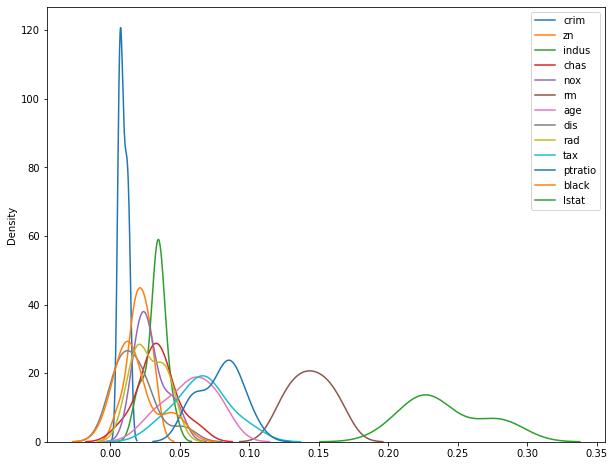

In [11]:
plt.figure(figsize = (10,8))
for i,vars in enumerate(list(x)) :
    sns.kdeplot(pfi1.importances[i], label = vars)

plt.legend()
plt.show()

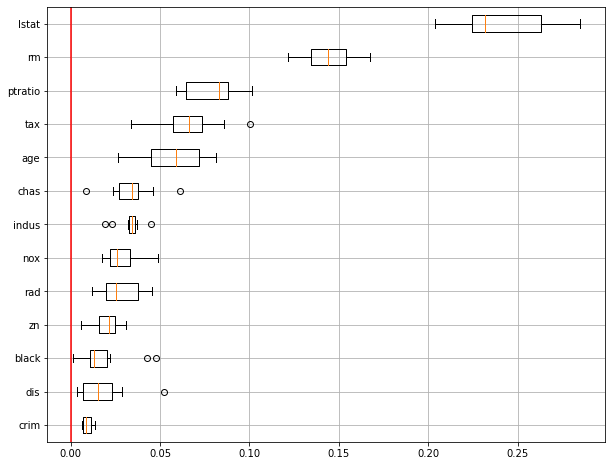

In [14]:
sorted_idx = pfi1.importances_mean.argsort()
plt.figure(figsize = (10, 8))
plt.boxplot(pfi1.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

* 평균값으로 변수중요도 그래프 그리기 

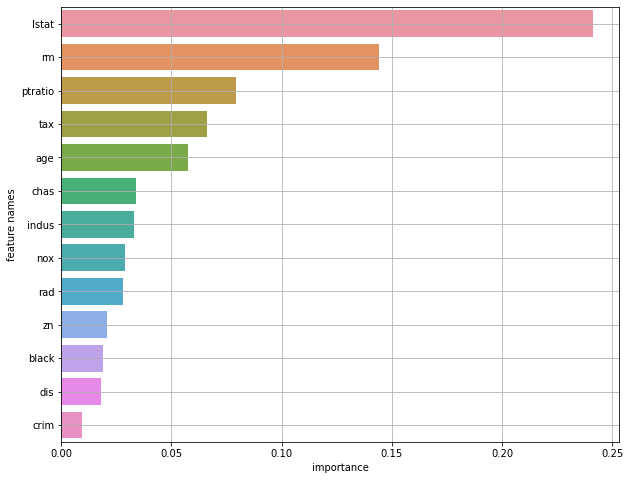

In [15]:
result = plot_feature_importance(pfi1.importances_mean, list(x_train))

### 2) DL 모델

* 간단한 DL 모델을 생성해 봅시다.

In [16]:
x_train_s.shape[1]

13

In [17]:
nfeatures = x_train_s.shape[1]
clear_session()

model2 = Sequential([Dense(32, input_shape = [nfeatures,], activation = 'relu'),
                     Dense(8, activation = 'relu'),
                     Dense(1)
                     ])

model2.compile(optimizer = 'adam', loss = 'mse')
history = model2.fit(x_train_s, y_train, epochs = 200, validation_split = .2).history

Epoch 1/200
11/11 [==============================] - 1s 12ms/step - loss: 689.8522 - val_loss: 648.0399
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 667.5606 - val_loss: 628.6442
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 650.8311 - val_loss: 615.3438
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 639.6349 - val_loss: 606.2842
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 631.1902 - val_loss: 597.9129
Epoch 6/200
11/11 [==============================] - 0s 3ms/step - loss: 623.0309 - val_loss: 590.1878
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 615.7468 - val_loss: 583.5831
Epoch 8/200
11/11 [==============================] - 0s 3ms/step - loss: 608.7946 - val_loss: 576.4199
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 601.1174 - val_loss: 567.9525
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss

* permutation feature importance 구하기
    * deep learning 모델에 대해서는 명시적으로 scoring = 'r2'을 지정해 줘야 합니다.

In [18]:
pfi2 = permutation_importance(model2, x_val_s, y_val, n_repeats=10, scoring = 'r2', random_state=2022)

In [19]:
pfi2

{'importances_mean': array([0.03363515, 0.01516896, 0.01469807, 0.0095957 , 0.02122448,
        0.19565557, 0.00455278, 0.03861599, 0.09165237, 0.08894262,
        0.05132706, 0.06277602, 0.52573534]),
 'importances_std': array([0.01136031, 0.00924   , 0.00600744, 0.0098372 , 0.00644223,
        0.03220402, 0.01024445, 0.02255314, 0.03236543, 0.01861765,
        0.01370781, 0.01843843, 0.06806698]),
 'importances': array([[ 3.75184270e-02,  3.84729677e-02,  4.17467982e-02,
          4.16575038e-02,  1.58740613e-02,  3.55364286e-02,
          5.42660378e-02,  2.26023242e-02,  3.07666315e-02,
          1.79103527e-02],
        [ 7.86958732e-03,  1.60846080e-02,  4.91738229e-03,
          2.84860169e-02,  2.26849137e-02,  1.32617859e-02,
          2.85284998e-02,  9.03487631e-04,  8.38767572e-03,
          2.05656781e-02],
        [ 9.17197385e-03,  1.85441916e-02,  1.32046201e-02,
          2.40335137e-03,  1.02539302e-02,  2.13307807e-02,
          2.39702240e-02,  1.58564380e-02,  1.42

* feature별 Score 분포

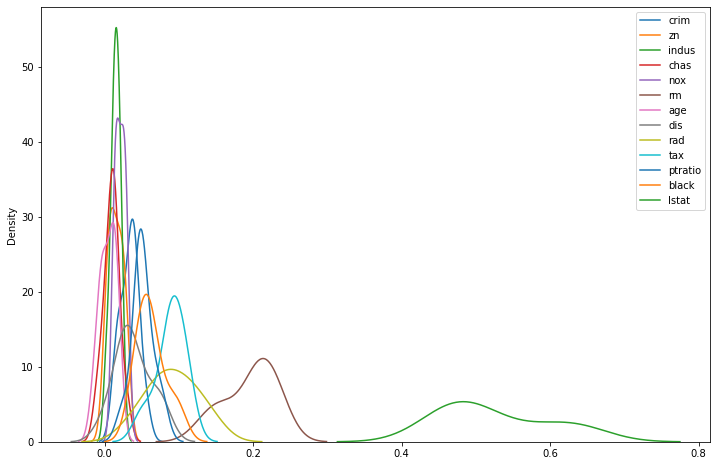

In [20]:
plt.figure(figsize = (12,8))
for i,vars in enumerate(list(x)) :
    sns.kdeplot(pfi2.importances[i], label = vars)

plt.legend()
plt.show()

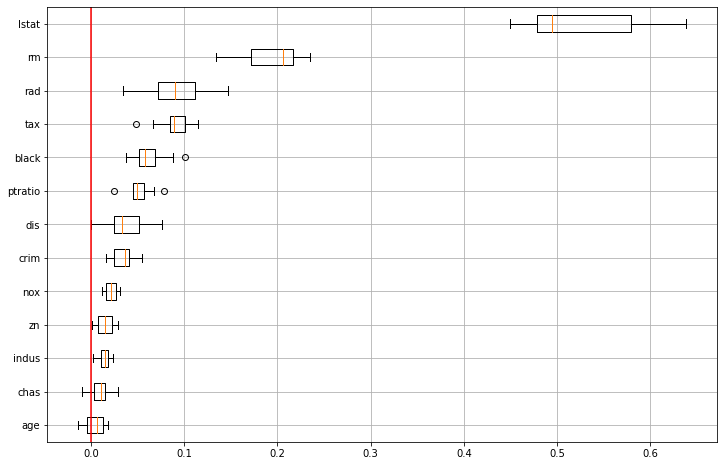

In [21]:
sorted_idx = pfi2.importances_mean.argsort()
plt.figure(figsize = (12,8))
plt.boxplot(pfi2.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

* 평균값으로 변수중요도 그래프 그리기 

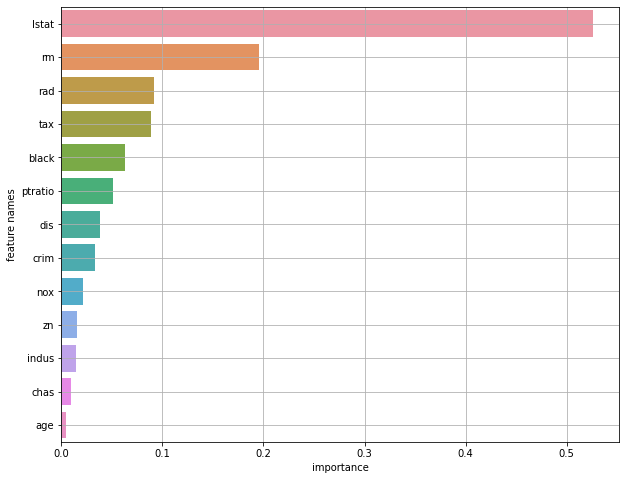

In [22]:
result = plot_feature_importance(pfi2.importances_mean, list(x_train))

In [23]:
from sklearn.metrics import *

In [24]:
pred1 = model1.predict(x_val_s)
print(mean_absolute_error(y_val, pred1))

3.2468419828844173


In [25]:
pred2 = model2.predict(x_val_s)
print(mean_absolute_error(y_val, pred2))

3.7719588971605487


## 4.실습 : 직원 이직 예측모델 변수 중요도 비교

### 1) 데이터 준비

* 데이터 로딩

In [26]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition2.csv"
data = pd.read_csv(path)
data.head(10)

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1
5,0,44,Research & Development,2,1,Medical,Male,Manufacturing Director,3,Single,10209,5,2,16,2,2,2
6,0,41,Sales,10,2,Life Sciences,Male,Sales Executive,4,Single,6230,7,4,16,3,3,14
7,0,25,Sales,18,1,Life Sciences,Male,Sales Executive,3,Married,6232,2,2,6,3,2,3
8,0,50,Research & Development,2,3,Medical,Male,Research Director,3,Married,17639,5,4,30,3,3,4
9,0,47,Sales,4,2,Life Sciences,Female,Sales Executive,4,Single,4163,1,3,9,0,3,9


|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	|		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


In [27]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [28]:
y.value_counts() / y.shape[0]

0    0.913043
1    0.086957
Name: Attrition, dtype: float64

* 가변수화 Dummy Variable

In [29]:
dummy_vars = ['Education','Department','EducationField','Gender','JobRole','JobSatisfaction','MaritalStatus',
              'RelationshipSatisfaction','WorkLifeBalance'] # 가변수화 대상 변수 이름 리스트 만든다
x = pd.get_dummies(x, columns = dummy_vars, drop_first=True) 

* 데이터 분할
    * 이미 test set은 분할되어 있다고 가정합니다.
    * 주어진 데이터를 train set : validation set 으로 분할

In [30]:
# train_val에서 train : val = 8 : 2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 2022)

In [31]:
print(x_train.shape, x_val.shape)

(920, 38) (230, 38)


* class balance를 맞추기 위한 resampling

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
smote = SMOTE()
sm_x_train, sm_y_train = smote.fit_resample(x_train, y_train)

* 스케일링

In [37]:
scaler = MinMaxScaler()
sm_x_train_s = scaler.fit_transform(sm_x_train)
x_val_s = scaler.transform(x_val)

### 2) 모델링 및 변수 중요도 계산하기

* model1 : SVM
* model2 : KNN

In [38]:
from sklearn.inspection import permutation_importance

#### ① SVM 모델

* 모델링

In [39]:
SVR_model = SVC()
SVR_model.fit(sm_x_train_s, sm_y_train)

SVC()

* permutation feature importance 구하기

In [60]:
SVR_pfi = permutation_importance(SVR_model, x_val_s, y_val, n_repeats=10, random_state=2022)
SVR_pfi

{'importances_mean': array([ 0.00086957,  0.00130435,  0.00434783,  0.00217391,  0.00217391,
         0.00086957,  0.00086957,  0.00347826,  0.00478261,  0.00173913,
        -0.00043478, -0.00130435,  0.00869565,  0.00869565,  0.00130435,
         0.00652174,  0.00695652,  0.00826087,  0.00347826,  0.00869565,
        -0.0026087 ,  0.00130435, -0.00043478,  0.        ,  0.00478261,
         0.00913043,  0.00043478,  0.00086957,  0.00043478,  0.0026087 ,
         0.00043478,  0.00565217,  0.00086957, -0.00478261,  0.00086957,
         0.00391304,  0.01565217,  0.00782609]),
 'importances_std': array([0.00325362, 0.00199242, 0.00336781, 0.0044552 , 0.00217391,
        0.00425998, 0.00173913, 0.0026087 , 0.00234138, 0.00398485,
        0.00130435, 0.00616411, 0.00673562, 0.0047628 , 0.00199242,
        0.0040085 , 0.00443393, 0.00304348, 0.00173913, 0.00336781,
        0.00347826, 0.00199242, 0.00493818, 0.00194441, 0.00657945,
        0.00493818, 0.00130435, 0.00379035, 0.00493818, 0.005

* feature별 Score 분포

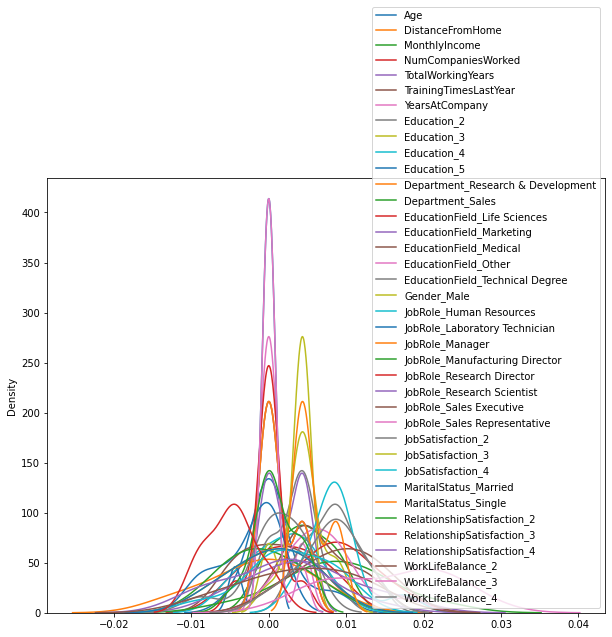

In [61]:
plt.figure(figsize = (10,8))
for i,vars in enumerate(list(x)) :
    sns.kdeplot(SVR_pfi.importances[i], label = vars)

plt.legend()
plt.show()

In [62]:
sorted_idx = SVR_pfi.importances_mean.argsort()
sorted_idx 

array([33, 20, 11, 22, 10, 23, 28, 30, 26, 34, 27,  0, 32,  6,  5, 14,  1,
       21,  9,  4,  3, 29, 18,  7, 35,  2,  8, 24, 31, 15, 16, 37, 17, 19,
       13, 12, 25, 36])

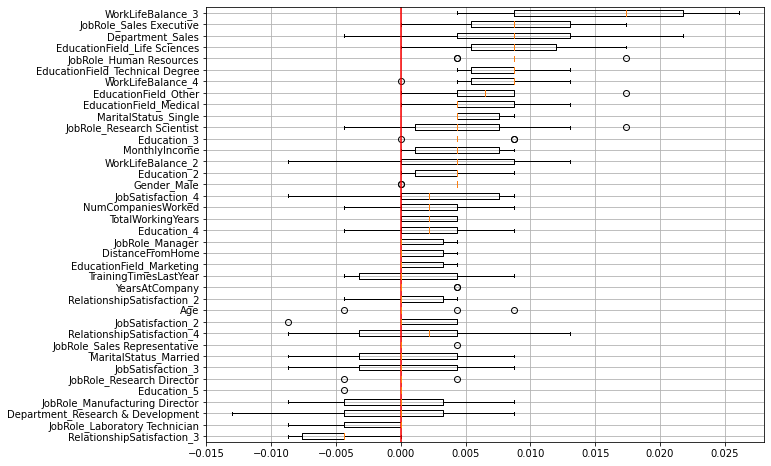

In [63]:
plt.figure(figsize = (10, 8))
plt.boxplot(SVR_pfi.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

* 평균값으로 변수중요도 그래프 그리기 

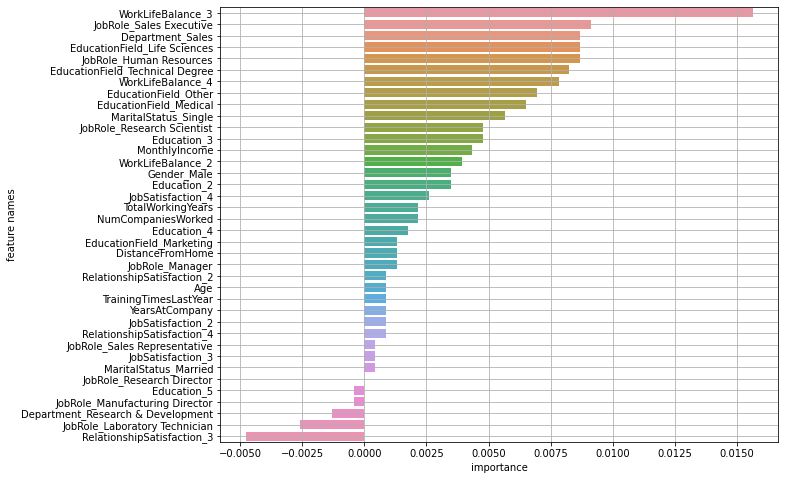

In [64]:
SVC_result = plot_feature_importance(SVR_pfi.importances_mean, list(x_train))

* 예측 및 평가

In [65]:
SVC_pred = SVR_model.predict(x_val_s)
print(classification_report(y_val, SVC_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       217
           1       0.50      0.23      0.32        13

    accuracy                           0.94       230
   macro avg       0.73      0.61      0.64       230
weighted avg       0.93      0.94      0.93       230



#### ② KNN 모델

* 모델링

In [66]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(sm_x_train_s, sm_y_train)

KNeighborsClassifier()

* permutation feature importance 구하기

In [67]:
KNN_pfi = permutation_importance(KNN_model, x_val_s, y_val, n_repeats=10, random_state=2022)
KNN_pfi

{'importances_mean': array([ 3.47826087e-03,  1.30434783e-03,  4.34782609e-03,  3.47826087e-03,
         6.95652174e-03, -4.34782609e-04,  7.39130435e-03,  1.73913043e-02,
         4.47826087e-02,  3.73913043e-02,  0.00000000e+00,  4.95652174e-02,
         2.86956522e-02,  4.26086957e-02,  1.86956522e-02,  4.43478261e-02,
        -2.17391304e-03,  1.17391304e-02, -1.08695652e-02,  8.69565217e-03,
        -4.44089210e-17,  8.69565217e-03,  7.39130435e-03,  3.04347826e-03,
         2.95652174e-02,  2.60869565e-02, -3.91304348e-03,  1.43478261e-02,
         2.08695652e-02,  2.17391304e-02,  3.04347826e-03,  1.34782609e-02,
         2.86956522e-02,  3.47826087e-02,  2.43478261e-02,  2.52173913e-02,
         4.39130435e-02,  9.13043478e-03]),
 'importances_std': array([0.00468275, 0.01134608, 0.00434783, 0.00928442, 0.00484153,
        0.00686075, 0.00551677, 0.0047628 , 0.01065883, 0.00443393,
        0.        , 0.01120356, 0.00556793, 0.01358304, 0.00278397,
        0.01006595, 0.0029166

* feature별 Score 분포

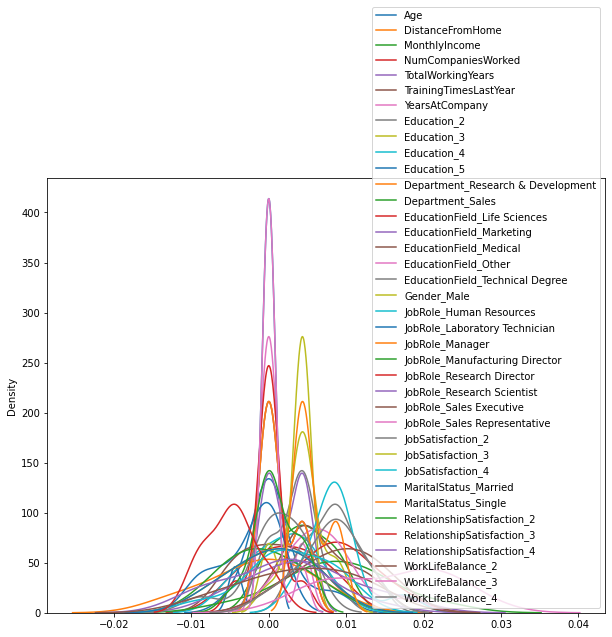

In [68]:
plt.figure(figsize = (10,8))
for i,vars in enumerate(list(x)) :
    sns.kdeplot(SVR_pfi.importances[i], label = vars)

plt.legend()
plt.show()

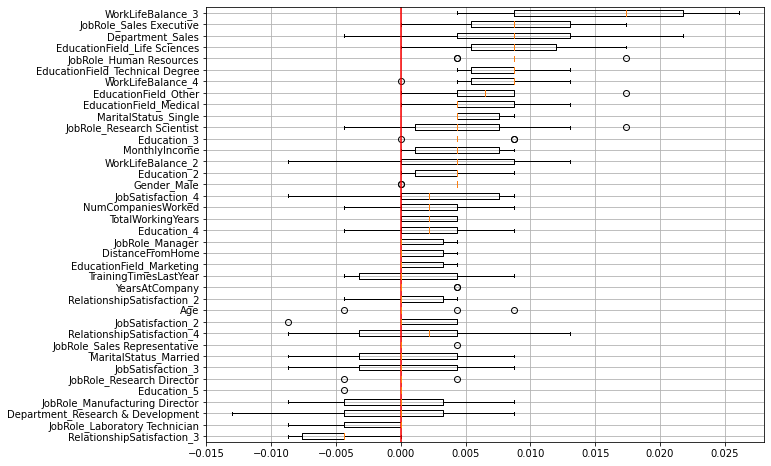

In [69]:
sorted_idx = SVR_pfi.importances_mean.argsort()

plt.figure(figsize = (10, 8))
plt.boxplot(SVR_pfi.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

* 평균값으로 변수중요도 그래프 그리기 

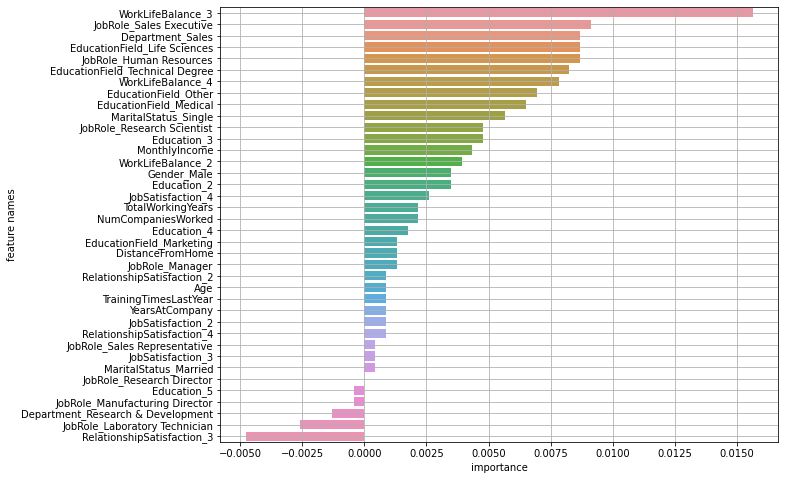

In [70]:
KNN_result = plot_feature_importance(SVR_pfi.importances_mean, list(x_train))

* 예측 및 평가

In [71]:
SVC_pred = SVR_model.predict(x_val_s)
print(classification_report(y_val, SVC_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       217
           1       0.50      0.23      0.32        13

    accuracy                           0.94       230
   macro avg       0.73      0.61      0.64       230
weighted avg       0.93      0.94      0.93       230

